<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/Korelasi_emisi_gas_buang_terhadap_GDP_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/drive/My Drive/developerProjects/pandas/dataset/World Development Indicators/Indicators.csv')
data.shape

(5656458, 6)

In [9]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [10]:
coutries = data.CountryName.unique().tolist()

coutries

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [12]:
len(coutries)

247

In [13]:
years = data["Year"].unique().tolist()
len(years)

56

In [14]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [15]:
print(min(years)," sampai ",max(years))

1960  sampai  2015


In [16]:
mask = data['CountryName'].str.contains("Indonesia")
data_indonesia = data[mask]
data_indonesia.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11777,Indonesia,IDN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.438518e+02
11778,Indonesia,IDN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,7.684516e+01
11779,Indonesia,IDN,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.338433e+00
11780,Indonesia,IDN,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.050673e+01
11781,Indonesia,IDN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,5.145631e+01
11782,Indonesia,IDN,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1960,8.963293e+09
11783,Indonesia,IDN,"Agriculture, value added (constant LCU)",NV.AGR.TOTL.KN,1960,1.902434e+14
11784,Indonesia,IDN,"Agriculture, value added (current LCU)",NV.AGR.TOTL.CN,1960,2.120000e+08
11785,Indonesia,IDN,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.440000e+08
11786,Indonesia,IDN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.456000e+01


In [17]:
len(data_indonesia)

36252

In [18]:
mask2 = data['IndicatorName'].str.contains('CO2 emissions \(metric') 
data_co2_indonesia = data[mask & mask2]
data_co2_indonesia.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11789,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.243805
36754,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.288720
64301,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.248447
92752,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.239681
121550,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.229361


In [19]:
print(min(data_co2_indonesia['Year'])," sampai ",max(data_co2_indonesia['Year']))

1960  sampai  2011


In [20]:
mask3 = data['IndicatorName'].str.contains('GDP per capita \(constant 2005') 
data_gdp_indonesia = data[mask & mask3]
data_gdp_indonesia.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11822,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,288.963670
36790,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,298.625695
64339,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,296.372284
92788,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,282.082945
121586,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,284.100832


In [21]:
print(min(data_gdp_indonesia['Year'])," sampai ",max(data_gdp_indonesia['Year']))

1960  sampai  2014


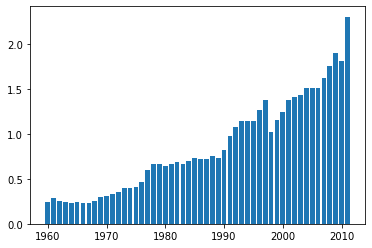

In [22]:
# get the years
years = data_co2_indonesia['Year'].values
# get the values 
co2 = data_co2_indonesia['Value'].values

# create
plt.bar(years,co2)
plt.show()

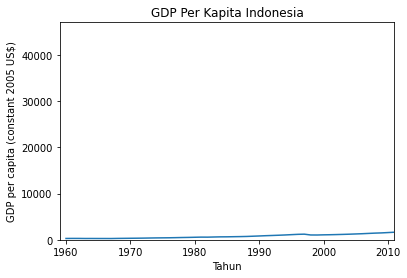

In [23]:
# switch to a line plot
plt.plot(data_gdp_indonesia['Year'].values, data_gdp_indonesia['Value'].values)

# Label the axes
plt.xlabel('Tahun')
plt.ylabel(data_gdp_indonesia['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Kapita Indonesia')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,47000])

plt.show()

In [24]:
data_gdp_indonesia_norm = data_gdp_indonesia[data_gdp_indonesia['Year'] < 2012]
print(len(data_co2_indonesia))
print(len(data_gdp_indonesia_norm))

52
52


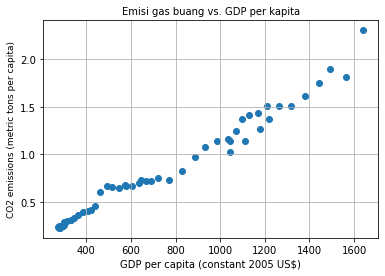

In [25]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Emisi gas buang vs. GDP per kapita',fontsize=10)
axis.set_xlabel(data_gdp_indonesia_norm['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(data_co2_indonesia['IndicatorName'].iloc[50],fontsize=9)

X = data_gdp_indonesia_norm['Value']
Y = data_co2_indonesia['Value']

axis.scatter(X, Y)
plt.show()

In [26]:
np.corrcoef(data_gdp_indonesia_norm['Value'],data_co2_indonesia['Value'])

array([[1.        , 0.98770338],
       [0.98770338, 1.        ]])